<a href="https://colab.research.google.com/github/RaghavendraReddy004/DV_Tasks_Repo/blob/main/DV_Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

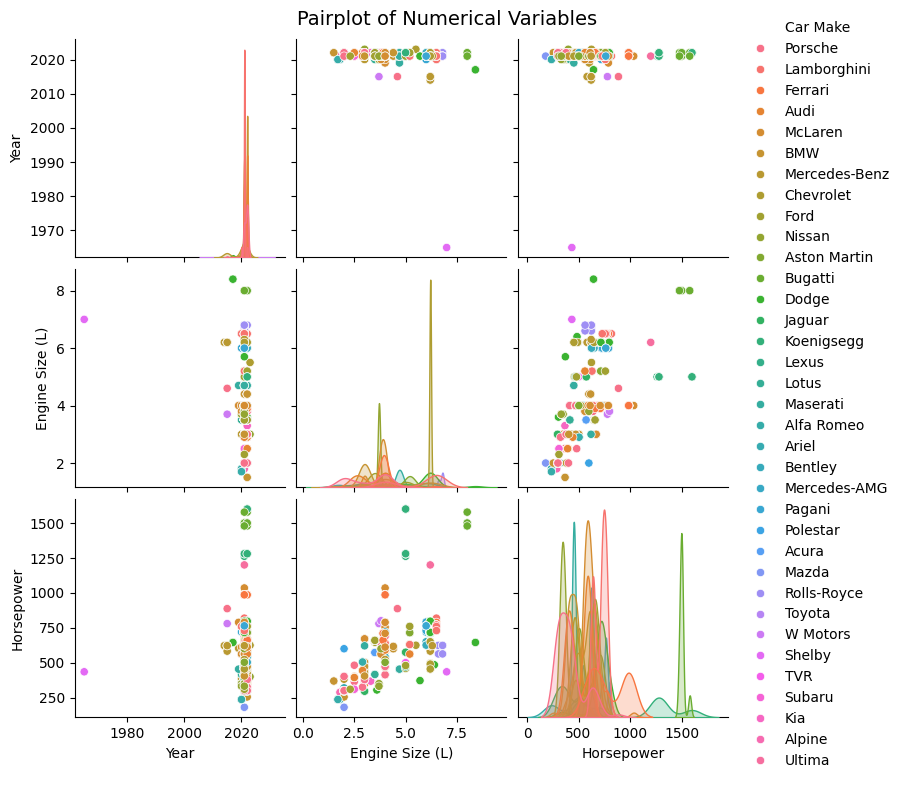

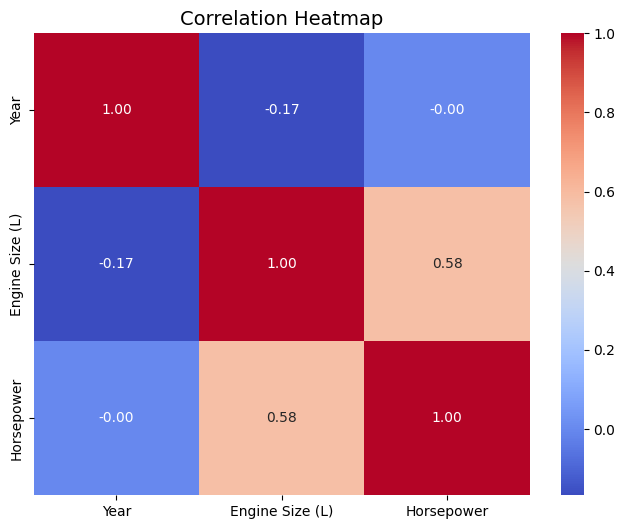

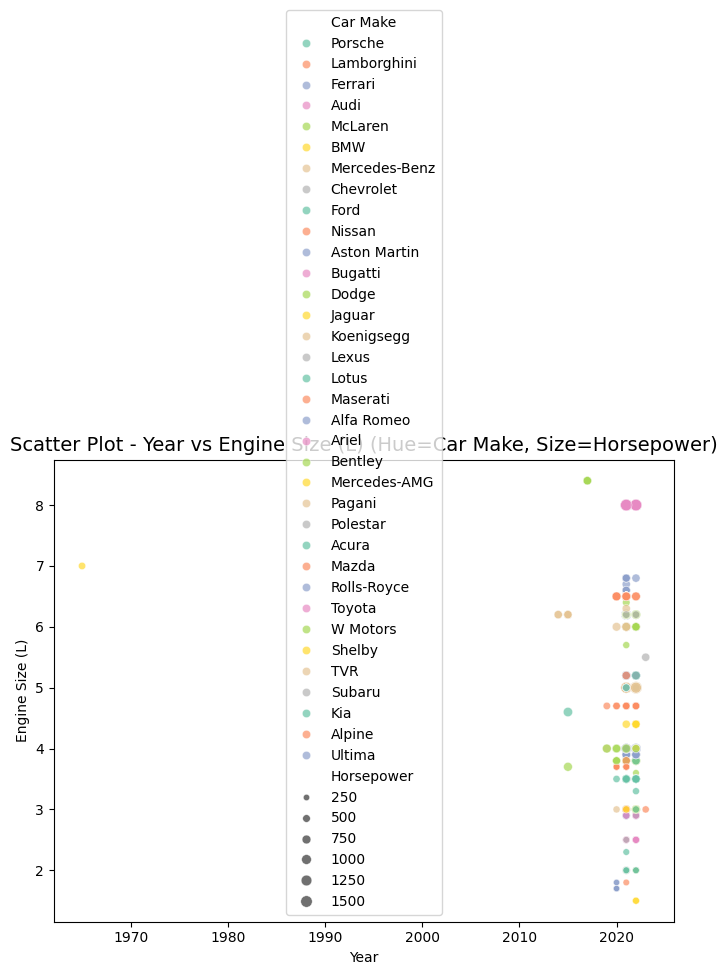

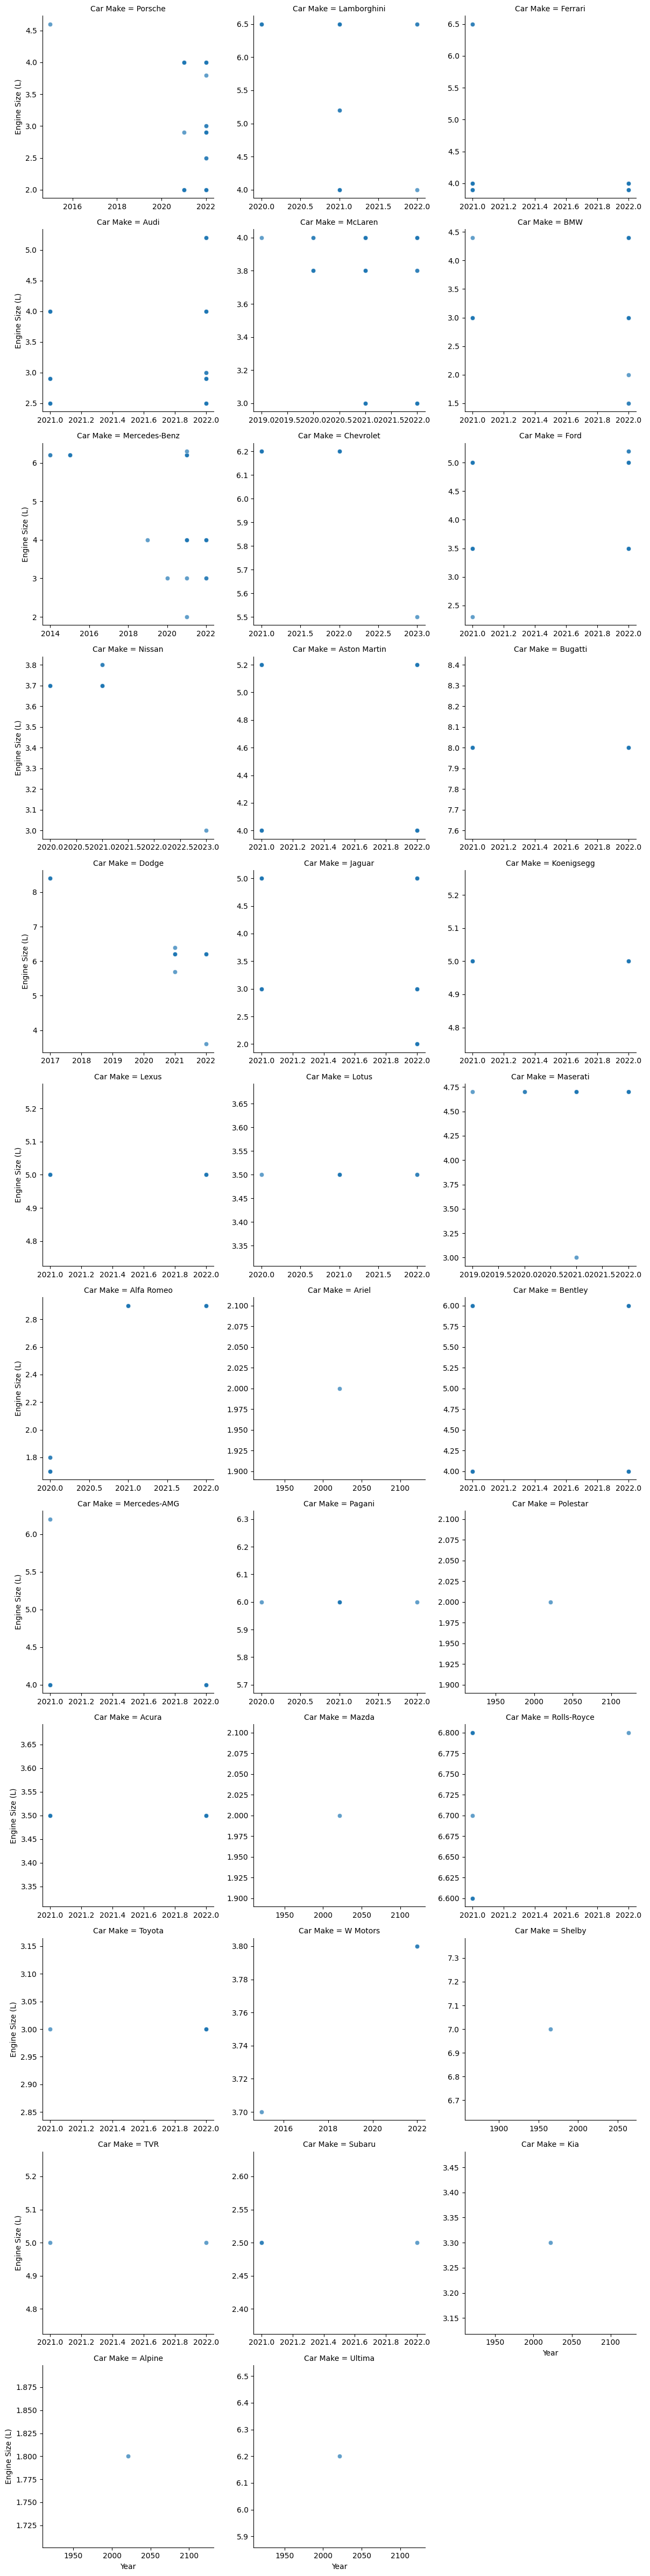

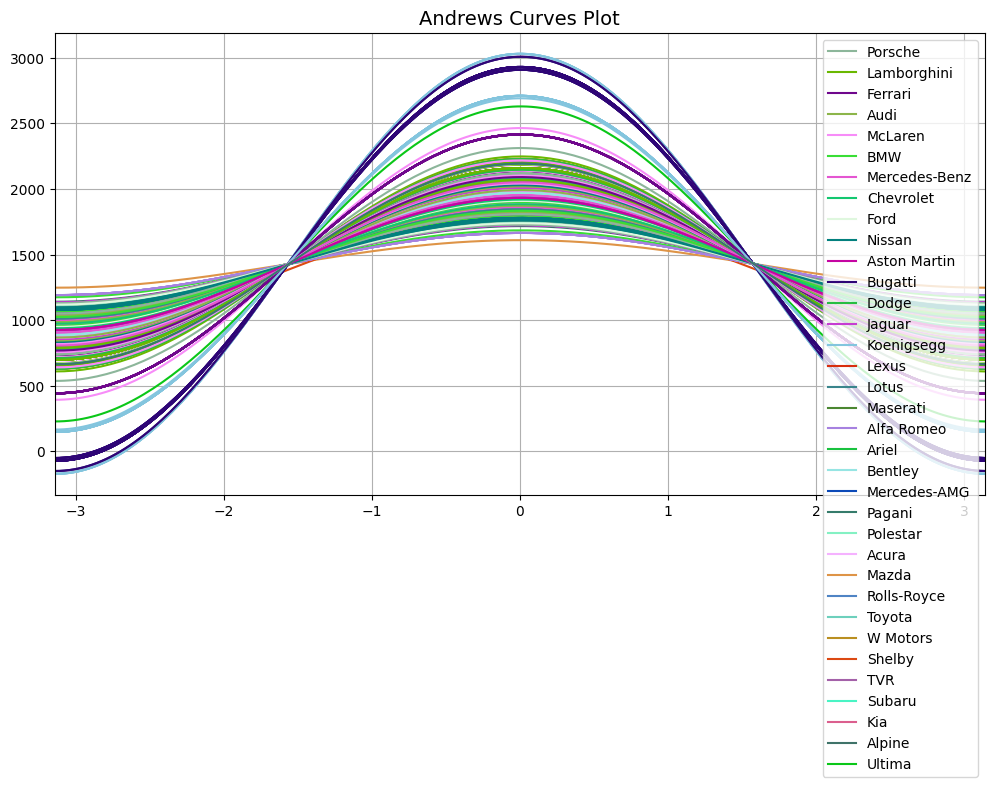

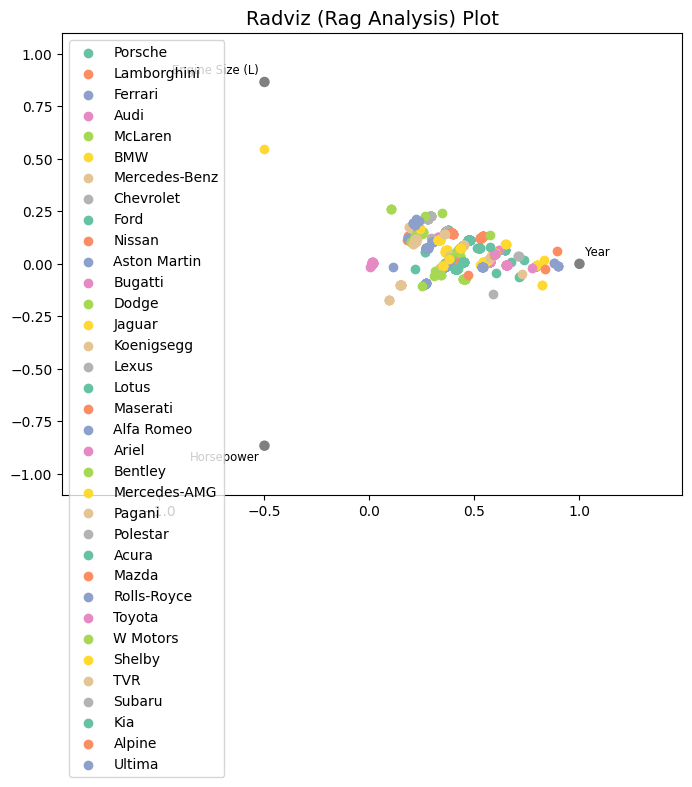

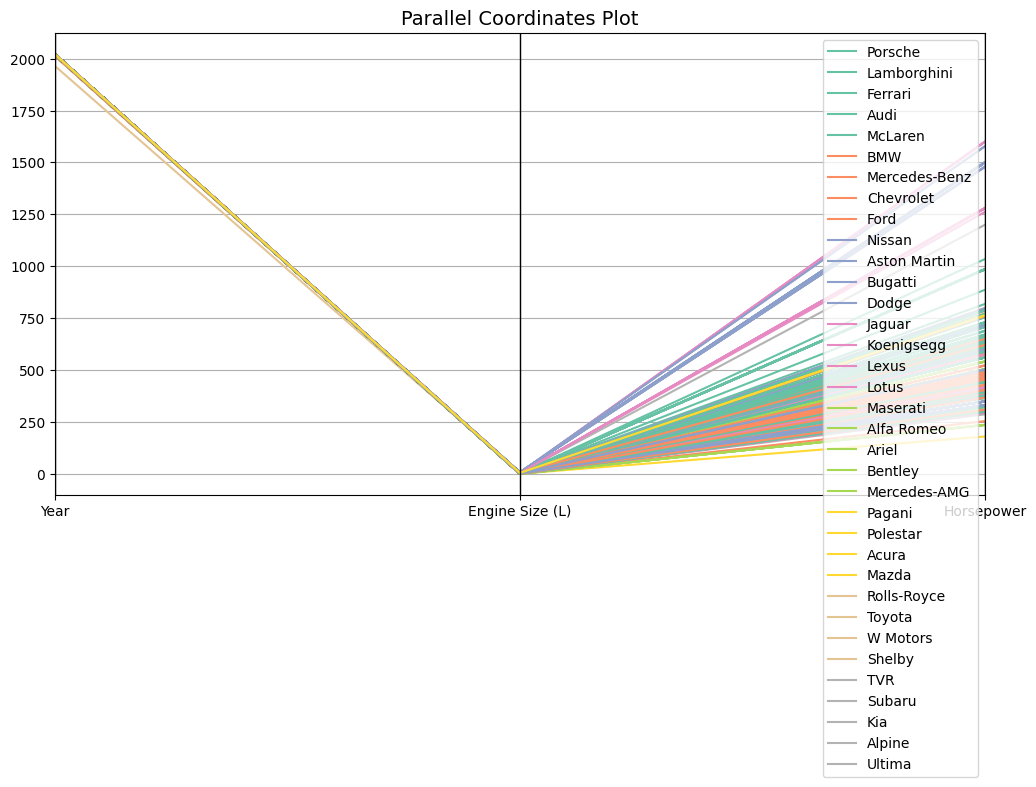

In [ ]:
# ✅ Install libraries (only needed once in Colab)
!pip install seaborn matplotlib pandas plotly

# 📦 Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas.plotting import andrews_curves, radviz, parallel_coordinates

# 📂 Load dataset
df = pd.read_csv("/content/Sport car price (1).csv")

# 🔎 Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Explicitly define numerical & categorical columns
num1 = 'Year'
num2 = 'Engine Size (L)'
num3 = 'Horsepower'
cat = categorical_cols[0]   # usually 'Car Make'

# 🧹 Convert numerical columns safely
df[num1] = pd.to_numeric(df[num1], errors="coerce")
df[num2] = pd.to_numeric(df[num2], errors="coerce")
df[num3] = pd.to_numeric(df[num3], errors="coerce")

# Drop rows with NaN in selected columns
df_clean = df[[num1, num2, num3, cat]].dropna()

# ------------------------
# 1. Pairplot
# ------------------------
sns.pairplot(data=df_clean, vars=[num1, num2, num3], hue=cat, diag_kind="kde")
plt.suptitle("Pairplot of Numerical Variables", y=1.02, fontsize=14)
plt.show()

# ------------------------
# 2. Correlation Heatmap
# ------------------------
plt.figure(figsize=(8,6))
sns.heatmap(df_clean[[num1, num2, num3]].corr(), annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

# ------------------------
# 3. Scatter plot with multiple encodings
# ------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(x=num1, y=num2, hue=cat, size=num3, data=df_clean, alpha=0.7, palette="Set2")
plt.title(f"Scatter Plot - {num1} vs {num2} (Hue={cat}, Size={num3})", fontsize=14)
plt.show()

# ------------------------
# 4. 3D Scatter Plot (Plotly)
# ------------------------
fig = px.scatter_3d(df_clean, x=num1, y=num2, z=num3, color=cat,
                    size=num3, opacity=0.7,
                    title=f"3D Scatter Plot - {num1}, {num2}, {num3} by {cat}")
fig.show()

# ------------------------
# 5. FacetGrid (multiple subplots by category)
# ------------------------
g = sns.FacetGrid(df_clean, col=cat, col_wrap=3, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.scatterplot, x=num1, y=num2, alpha=0.7)
g.set_axis_labels(num1, num2)
g.add_legend()
plt.show()

# ------------------------
# 6. Andrews Curves
# ------------------------
plt.figure(figsize=(12,6))
andrews_curves(df_clean, class_column=cat)
plt.title("Andrews Curves Plot", fontsize=14)
plt.show()

# ------------------------
# 7. Radviz (Rag Analysis)
# ------------------------
plt.figure(figsize=(8,6))
radviz(df_clean, class_column=cat, color=sns.color_palette("Set2", len(df_clean[cat].unique())))
plt.title("Radviz (Rag Analysis) Plot", fontsize=14)
plt.show()

# ------------------------
# 8. Parallel Coordinates
# ------------------------
plt.figure(figsize=(12,6))
parallel_coordinates(df_clean, class_column=cat, colormap=plt.cm.Set2)
plt.title("Parallel Coordinates Plot", fontsize=14)
plt.show()


In [ ]:
!pip install seaborn matplotlib pandas plotly

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv("/content/Sport car price.csv")

categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64','float64']).columns

cat = categorical_cols[0]   # pick first categorical

# Select specific numerical columns for plotting
num1 = 'Year'
num2 = 'Torque (lb-ft)'
num3 = 'Horsepower'

# Convert numerical columns to numeric, coercing errors
df[num1] = pd.to_numeric(df[num1], errors='coerce')
df[num2] = pd.to_numeric(df[num2], errors='coerce')
df[num3] = pd.to_numeric(df[num3], errors='coerce')

# Drop rows with NaN in selected numerical and categorical columns
cols_to_check_nan = [num1, num2, num3, cat]
df_cleaned = df.dropna(subset=cols_to_check_nan)

# Get the top 4 car makes
top_4_car_makes = df_cleaned[cat].value_counts().nlargest(4).index.tolist()

# Filter the DataFrame to include only the top 4 car makes
df_top_4 = df_cleaned[df_cleaned[cat].isin(top_4_car_makes)]

# 1. Pairplot
sns.pairplot(data=df_cleaned, vars=[num1, num2, num3])
plt.suptitle("Pairplot of Numerical Variables", y=1.02)
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_cleaned[[num1, num2, num3]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 3. Scatter plot with multiple encodings
sns.scatterplot(x=num1, y=num2, hue=cat, size=num3, data=df_cleaned, alpha=0.7)
plt.title(f"Scatter Plot - {num1} vs {num2} (Hue={cat}, Size={num3})")
plt.show()

# 4. 3D Scatter Plot
fig = px.scatter_3d(df_cleaned, x=num1, y=num2, z=num3, color=cat)
fig.update_layout(title=f"3D Scatter Plot - {num1}, {num2}, {num3} by {cat}")
fig.show()

# 5. FacetGrid (multiple subplots by category) - showing top 4
g = sns.FacetGrid(df_top_4, col=cat, col_wrap=2, height=5, aspect=1.2)
g.map_dataframe(sns.scatterplot, x=num1, y=num2)
g.add_legend()
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/Sport car price.csv'